<a href="https://colab.research.google.com/github/Gokulvasan-V/pandas/blob/main/Guvi_pandas_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Advanced Module** (Continuous)

**Visualization**

In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/Guvi_python/Guvi Premium courses/Pandas/Dataset/sales_information.csv'
df = pd.read_csv(path)
df_copy = df.copy()

In [3]:
df.head()

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
0,India,North,John,12/19/2017 0:00:00,100000,567
1,US,North,Bill,6/25/2014 0:00:00,120000,3000
2,UK,North,Thomas,9/12/2010 0:00:00,140000,345
3,Australia,East,John,9/30/2011 0:00:00,160000,1000
4,Africa,East,Bill,11/20/2016 0:00:00,180000,123


**Based on previous modification**

In [4]:
# concerting str to Timestamp type
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

# adding new columns
df['Selling Ratio'] = df['Total'] / df['Quantity']
df['Bonus(10%)'] = df['Total'] / 10

df.head()

,Country,Region,Sales Person,Date of Purchase,Total,Quantity,Selling Ratio,Bonus(10%)
0,India,North,John,2017-12-19,100000,567,176.366843,10000.0
1,US,North,Bill,2014-06-25,120000,3000,40.000000,12000.0
2,UK,North,Thomas,2010-09-12,140000,345,405.797101,14000.0
3,Australia,East,John,2011-09-30,160000,1000,160.000000,16000.0
4,Africa,East,Bill,2016-11-20,180000,123,1463.414634,18000.0


In [5]:
groupby_df = df.groupby(['Country'])[['Total']].sum()
groupby_df.loc['US'] = 600000 # in original shows wrong output, so i changed (based on video)
groupby_df.loc['Mylasia'] = 355000
groupby_df

,Total
Country,
Africa,460000
Australia,540000
India,540000
Mylasia,355000
Singapore,510000
UK,480000
US,600000


when we have a number R count based representation, Below graphs Would be perfect fit

Types of graphs:

*   bar
*   line
*   pie
*   scatter

graph properties

*   title
*   color
*   lable

Special effects

*   heatmap



<Axes: xlabel='Country'>

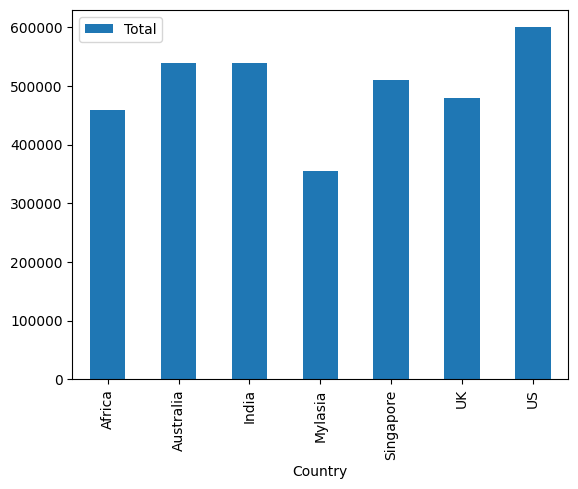

In [6]:
groupby_df.plot.bar()

<Axes: xlabel='Country'>

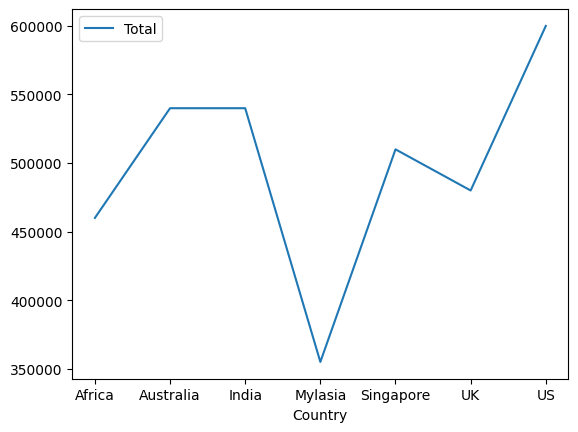

In [7]:
groupby_df.plot.line()

array([<Axes: ylabel='Total'>], dtype=object)

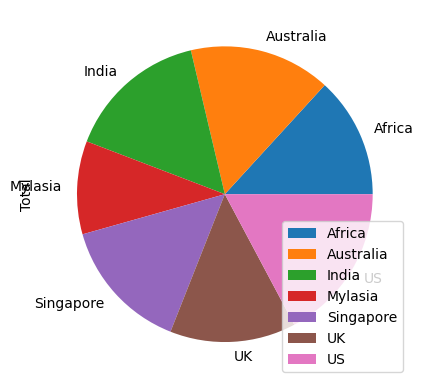

In [8]:
groupby_df.plot.pie(subplots=True)

<Axes: xlabel='Total', ylabel='Total'>

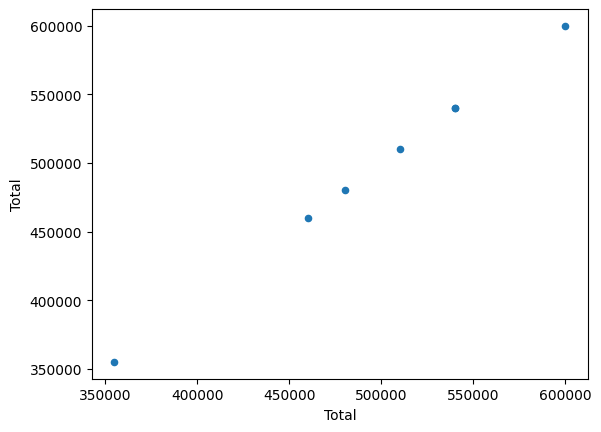

In [9]:
groupby_df.plot.scatter(x =0, y = 'Total' )

<Axes: title={'center': 'Sales/Country'}, xlabel='Country'>

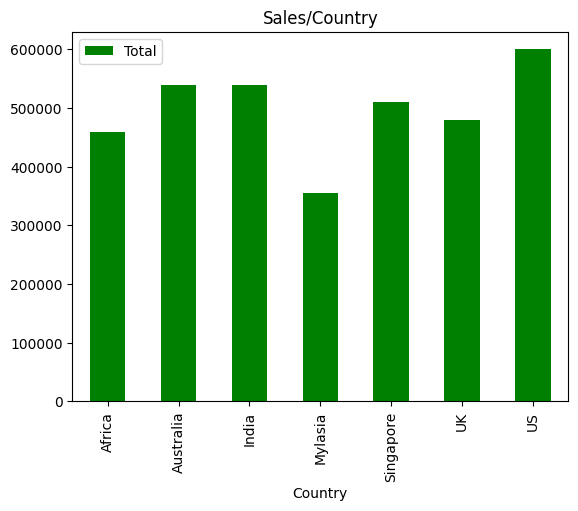

In [10]:
# properties

groupby_df.plot.bar(title = 'Sales/Country', color = 'green')

in Pandas we cant plot correlation plots (like heatmap) that time we want to use seaborn. Pandas doesn't support heatmap.

In [11]:
Corr = df[['Total', 'Quantity', 'Bonus(10%)', 'Selling Ratio']].corr()
Corr

,Total,Quantity,Bonus(10%),Selling Ratio
Total,1.000000,0.031260,1.000000,0.984196
Quantity,0.031260,1.000000,0.031260,-0.070494
Bonus(10%),1.000000,0.031260,1.000000,0.984196
Selling Ratio,0.984196,-0.070494,0.984196,1.000000


<Axes: >

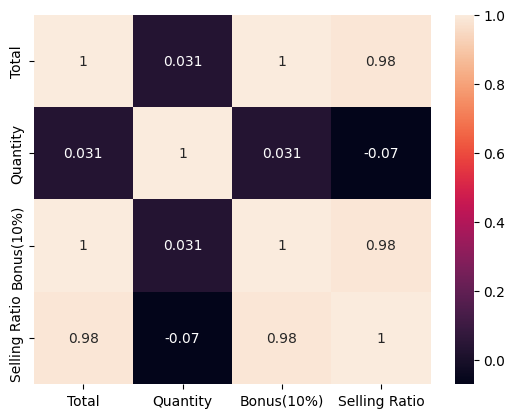

In [12]:
import seaborn as sns
sns.heatmap(Corr, annot = True)

**Merge & Join**

In [13]:
# need to create new data frame

new_df = pd.DataFrame()
new_df['Employee Name'] = df['Sales Person'].unique()
new_df

,Employee Name
0,John
1,Bill
2,Thomas


In [14]:
import random
exp = [1,2,4]
random.shuffle(exp)

In [15]:
new_df['Experience In Company'] = exp
new_df['Total Experience'] = new_df['Experience In Company'] + random.randint(1,10)
new_df

,Employee Name,Experience In Company,Total Experience
0,John,4,9
1,Bill,1,6
2,Thomas,2,7


In [16]:
df.merge(new_df, left_on = 'Sales Person', right_on = 'Employee Name')

,Country,Region,Sales Person,Date of Purchase,Total,Quantity,Selling Ratio,Bonus(10%),Employee Name,Experience In Company,Total Experience
0,India,North,John,2017-12-19,100000,567,176.366843,10000.0,John,4,9
1,Australia,East,John,2011-09-30,160000,1000,160.000000,16000.0,John,4,9
2,Mylasia,West,John,2014-09-15,1000000,7890,126.742712,100000.0,John,4,9
3,UK,North,John,2012-12-15,100000,1000,100.000000,10000.0,John,4,9
4,Singapore,East,John,2014-07-30,160000,892,179.372197,16000.0,John,4,9
5,US,West,John,2015-04-29,220000,90,2444.444444,22000.0,John,4,9
6,Africa,North,John,2012-09-30,140000,85,1647.058824,14000.0,John,4,9
7,US,North,Bill,2014-06-25,120000,3000,40.000000,12000.0,Bill,1,6
8,Africa,East,Bill,2016-11-20,180000,123,1463.414634,18000.0,Bill,1,6
9,India,West,Bill,2014-04-08,240000,200,1200.000000,24000.0,Bill,1,6
